## Components in MVO:

1. Daily Returns 📉

2. Mean Returns (μ) 📈

3. Covariance Matrix (Σ) 🤝

Let's select 8-10 stocks from the NIFTY50 index. The code will then compute their daily returns, mean returns, and the covariance matrix. Finally, explian how these components are used in Mean-Variance Optimization (MVO).

*NIFTY50 Stock Data and Calculations* :

We'll use a representative sample of stocks from different sectors within the NIFTY50. The tickers must have a .NS suffix to be correctly identified as NSE stocks by the yfinance library.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

# Select 10 NIFTY50 stock tickers with the .NS suffix
tickers = [
    'RELIANCE.NS',  # Reliance Industries (Energy/Diversified)
    'HDFCBANK.NS',  # HDFC Bank (Financial Services)
    'TCS.NS',       # Tata Consultancy Services (IT)
    'INFY.NS',      # Infosys (IT)
    'HINDUNILVR.NS',# Hindustan Unilever (FMCG)
    'ITC.NS',       # ITC (FMCG/Diversified)
    'LT.NS',        # Larsen & Toubro (Construction/Capital Goods)
    'BAJFINANCE.NS',# Bajaj Finance (Financial Services)
    'MARUTI.NS',    # Maruti Suzuki (Automobile)
    'ASIANPAINT.NS' # Asian Paints (Consumer Durables)
]

# Download historical 'Adj Close' prices for the last 5 years
data = yf.download(tickers, period="5y", auto_adjust=False)['Adj Close']

# 1. Compute Daily Returns
# We'll use logarithmic returns as they are additive and preferred for MVO.
daily_returns = np.log(data / data.shift(1)).dropna()

# 2. Compute Mean Returns (Annualized)
# The mean of log returns represents the average daily return. We annualize it
# by multiplying by the number of trading days in a year (~252).
mean_returns = daily_returns.mean() * 252

# 3. Compute Covariance Matrix (Annualized)
# The covariance matrix shows how each pair of stocks moves together.
# We annualize it by multiplying by 252.
cov_matrix = daily_returns.cov() * 252

print("--- Daily Log Returns (First 5 rows) ---")
print(daily_returns.head())
print("\n--- Annualized Mean Returns ---")
print(mean_returns)
print("\n--- Annualized Covariance Matrix ---")
print(cov_matrix)

[*********************100%***********************]  10 of 10 completed


--- Daily Log Returns (First 5 rows) ---
Ticker      ASIANPAINT.NS  BAJFINANCE.NS  HDFCBANK.NS  HINDUNILVR.NS  \
Date                                                                   
2020-09-16      -0.002705       0.002303     0.021395       0.008927   
2020-09-17      -0.002065      -0.014171    -0.009232      -0.007163   
2020-09-18       0.010133       0.000820    -0.024570      -0.013959   
2020-09-21      -0.027920      -0.042519    -0.007595      -0.029447   
2020-09-22      -0.017929      -0.008186    -0.013336      -0.005413   

Ticker       INFY.NS    ITC.NS     LT.NS  MARUTI.NS  RELIANCE.NS    TCS.NS  
Date                                                                        
2020-09-16  0.019454 -0.006346  0.012939   0.000730     0.002455  0.004645  
2020-09-17  0.009191 -0.011413 -0.016958   0.003945    -0.011161 -0.016942  
2020-09-18 -0.008792  0.002796 -0.006198  -0.017238     0.003019 -0.004500  
2020-09-21  0.007704 -0.018882 -0.021150  -0.049717    -0.021857  0.0

###Usage of Components in MVO
In the context of Mean-Variance Optimization, these three components are the fundamental inputs that drive the entire process.

1. Daily Returns 📉
The daily returns of each stock are the raw data used to calculate the other two key metrics. They represent the daily percentage change in an asset's price. For MVO, we need historical returns to estimate future expected returns and the relationships between assets. Logarithmic returns are often preferred over simple returns because they are additive, which simplifies calculations involving multiple periods.

2. Mean Returns (μ) 📈
The mean return of an asset is its average historical return. In MVO, this is used as the expected return for each stock. It represents the "reward" or the potential profit you can expect from holding that asset. The goal of MVO is to find a portfolio that maximizes the overall portfolio expected return for a given level of risk. The expected return of a portfolio is simply the weighted average of the individual assets' mean returns.

3. Covariance Matrix (Σ) 🤝
The covariance matrix is a square table that shows the covariance between every pair of assets in the portfolio. It is the most critical component for measuring and managing diversification.

The values on the diagonal of the matrix are the variances of each stock's returns (i.e., the squared standard deviation). These values represent the individual risk of each asset.

The off-diagonal values are the covariances between pairs of stocks. A positive covariance indicates that two stocks tend to move in the same direction, while a negative covariance indicates they tend to move in opposite directions.

MVO leverages these off-diagonal terms to reduce overall portfolio risk. By combining assets with low or negative covariance, the portfolio's total volatility can be less than the sum of the individual volatilities. This is the core principle of diversification: finding assets that zig when others zag to smooth out the portfolio's returns. The optimization algorithm uses the covariance matrix to calculate the portfolio's total variance and then finds the optimal weights to minimize this variance.

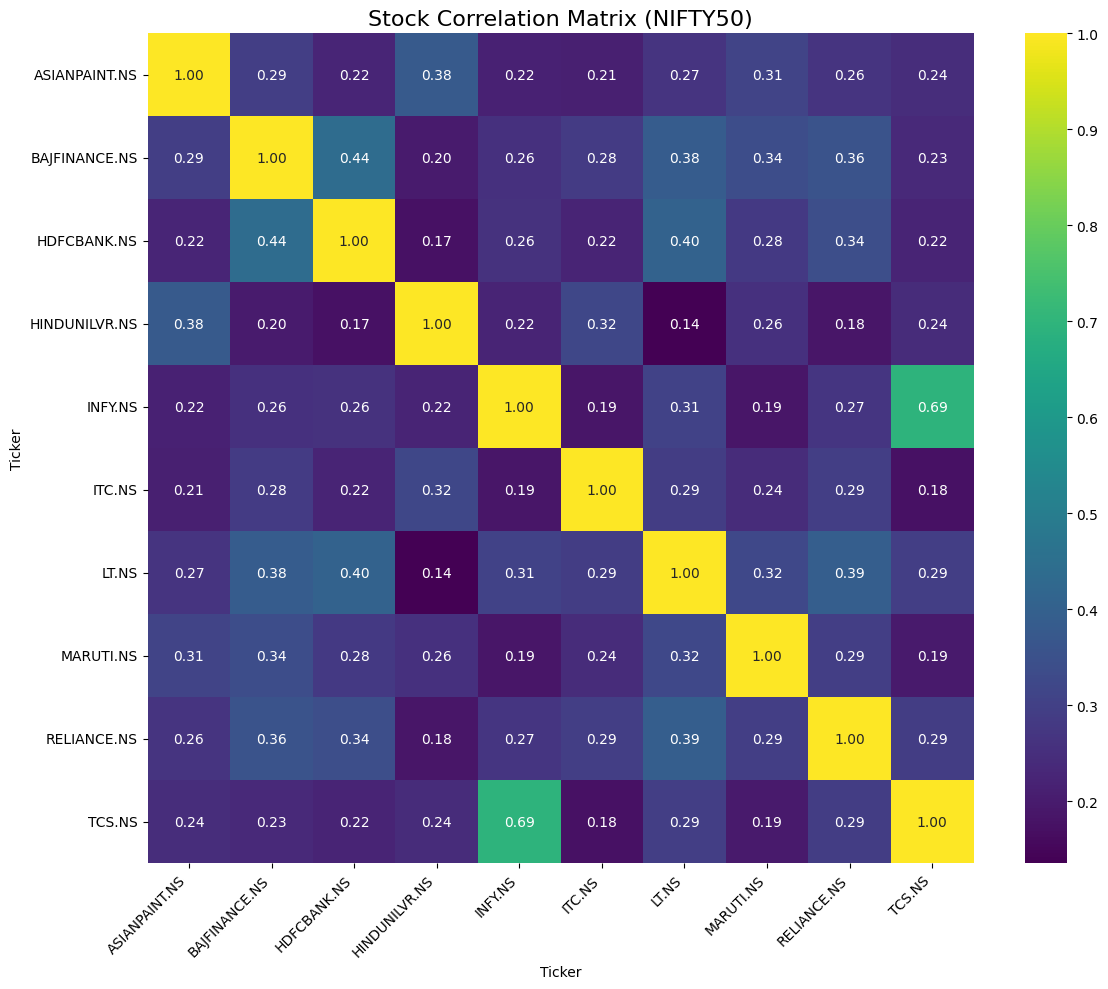

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the Correlation Matrix
correlation_matrix = daily_returns.corr()

# Create the Correlation Plot (Heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Stock Correlation Matrix (NIFTY50)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_plot.png')

1. Covariance Matrix
The annualized covariance matrix shows the covariance between each pair of stocks. The values on the diagonal represent the variance of each stock's returns (a measure of its individual risk), while the off-diagonal values show how the returns of two stocks move together.

2. Correlation Plot
The heatmap visualization displays the correlation matrix, a normalized version of the covariance matrix. The correlation coefficient ranges from -1 to +1:

A value close to +1 (dark green) indicates a strong positive correlation, meaning the stocks tend to move in the same direction.

A value close to -1 (dark purple) indicates a strong negative correlation, meaning the stocks tend to move in opposite directions.

A value close to 0 indicates a weak or no correlation.

For Mean-Variance Optimization, a good portfolio will combine assets with low or negative correlation. This is the essence of diversification, as it helps to reduce the overall volatility of the portfolio by smoothing out the ups and downs of individual assets. For example, if two stocks have a negative correlation, a decline in one is often offset by a gain in the other, stabilizing the portfolio's return.